# Notebook 1 - Fondamentaux Python pour l'IA
# Analyse de données météorologiques en temps réel

🎯 Objectifs pédagogiques

Maîtriser les structures de données Python essentielles
Consommer des APIs REST avec requests
Manipuler des données JSON et CSV
Créer des visualisations basiques
Appliquer des statistiques descriptives

🌤️ Contexte du projet

Vous travaillez pour une startup AgTech qui développe des solutions d'agriculture intelligente. Votre mission : analyser les données météorologiques de plusieurs villes européennes pour optimiser les recommandations de plantation.

Partie 1 : Connexion aux APIs météo

🔧 Installation des bibliothèques


 À exécuter dans votre terminal ou cellule
# pip install requests pandas matplotlib seaborn numpy

In [42]:
#📥 Import et configuration
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import json
from dotenv import load_dotenv
import os

🌍 API OpenWeatherMap (gratuite)

Inscription : Créez un compte sur openweathermap.org


Clé API : Récupérez votre clé gratuite (40 000 appels/mois)



In [43]:
### 💡 Première requête guidée
BASE_URL = "http://api.openweathermap.org/data/2.5"
CITIES = ["Paris", "Berlin", "Madrid", "Rome", "Amsterdam", "Vienna"]
load_dotenv()
api_key = os.getenv('VC_key')
owm_key = os.getenv('OWM_key')
def get_weather_data(city, api_key):
    """
    Récupère les données météo actuelles pour une ville

    Étapes à compléter :
    1. Construire l'URL avec les paramètres
    2. Faire l'appel API avec requests.get()
    3. Vérifier le status code
    4. Retourner les données JSON
    """
    # URL : current weather data
    url = f"{BASE_URL}/weather"

    # Paramètres à compléter
    params = {
        'q': city,
        'appid': api_key,
        'units': 'metric',  # Celsius
        'lang': 'fr'
    }

    # Votre code ici pour l'appel API
    # Gérez les erreurs HTTP !
    try:
        response = requests.get(url, params=params)
        if response.status_code == 200:
            return response.json()
        else:
            print(f'Erreur :  {response.status_code} : {response.text}')
    except requests.exceptions.RequestException as e:
        print(f'Erreur de connexion : {e}')



    return response.json()  




In [44]:
# Configuration API
load_dotenv()
API_KEY = os.getenv('OWM_key')
BASE_URL = "http://api.openweathermap.org/data/2.5"

# Villes à analyser (agriculture européenne)
CITIES = ["Paris", "Berlin", "Madrid", "Rome", "Amsterdam", "Vienna"]


def get_euro_weather(cities, API_KEY):
    url = f'{BASE_URL}/weather'
    results = []
    for city in cities:
        param = {
            'q': city,
            'appid': API_KEY,
            'units': 'metric',  # Celsius
            'lang': 'fr'
        }
        try:
            response = requests.get(url, params=param)
            if response.status_code == 200:
                data = response.json()
                results.append(data)
            else:
                print(f'Erreur :  {response.status_code} : {response.text}')
        except requests.exceptions.RequestException as e:
            print(f'Erreur de connexion : {e}')
    return results

list_weather = get_euro_weather(CITIES, API_KEY)

print(json.dumps(list_weather, indent=2, ensure_ascii=False))


[
  {
    "coord": {
      "lon": 2.3488,
      "lat": 48.8534
    },
    "weather": [
      {
        "id": 800,
        "main": "Clear",
        "description": "ciel dégagé",
        "icon": "01d"
      }
    ],
    "base": "stations",
    "main": {
      "temp": 18.65,
      "feels_like": 18.69,
      "temp_min": 17.88,
      "temp_max": 20.77,
      "pressure": 1021,
      "humidity": 81,
      "sea_level": 1021,
      "grnd_level": 1011
    },
    "visibility": 10000,
    "wind": {
      "speed": 3.09,
      "deg": 260
    },
    "clouds": {
      "all": 0
    },
    "dt": 1753775746,
    "sys": {
      "type": 1,
      "id": 6550,
      "country": "FR",
      "sunrise": 1753762797,
      "sunset": 1753817639
    },
    "timezone": 7200,
    "id": 2988507,
    "name": "Paris",
    "cod": 200
  },
  {
    "coord": {
      "lon": 13.4105,
      "lat": 52.5244
    },
    "weather": [
      {
        "id": 803,
        "main": "Clouds",
        "description": "nuageux",
        "icon"

**Questions de débogage :**
- Que faire si l'API retourne une erreur 401 ? </br>
Vérifier si nous avons toutes les autorisations (si notre clé API nous permet de requêter)
- Comment gérer une ville introuvable ? </br>
Trouver une ville/localité proche
---

- Vérifier si nous avons toutes les autorisations (si notre clé API nous permet de requêter)
- Trouver la ville la plus proche répertoriée

## Partie 2 : API complémentaire - Données historiques

### 📊 API Visual Crossing Weather (gratuite)
Alternative avec 1000 appels/jour gratuits : [visualcrossing.com](https://www.visualcrossing.com/weather-api)

In [102]:
# Configuration Visual Crossing
load_dotenv()
VC_API_KEY = os.getenv('VC_key')
VC_BASE_URL = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline"
start_date = '2025-07-25'
end_date = '2025-07-28'
CITIES = ["Paris", "Berlin", "Madrid", "Rome", "Amsterdam", "Vienna"]

def get_historical_weather(cities, start_date, end_date, api_key):
    """
    Récupère les données météo historiques

    Défis à résoudre :
    1. Construire l'URL avec les dates
    2. Gérer la pagination si nécessaire
    3. Extraire les données pertinentes du JSON complexe
    4. Convertir en DataFrame pandas
    """

    
    results = []
    for city in cities:
        url = f"{VC_BASE_URL}/{city}/{start_date}/{end_date}"
        params = {
            'key': api_key,
            'include': 'days',
            'unitGroup': 'metric',
            'elements': 'datetime,temp,humidity,precip,windspeed,pressure'
        }

        try:
            response = requests.get(url, params=params)
            if response.status_code == 200:
                data = response.json()
                for day in data['days']:
                    results.append({
                        'date': day['datetime'],
                        'ville': city, 
                        'température': day['temp'],
                        'humidite': day['humidity'],
                        'precipitation': day['precip'],
                        'vent': day['windspeed']
                        })
            else:
                print(f'Erreur :  {response.status_code} : {response.text}')
        except requests.exceptions.RequestException as e:
            print(f'Erreur de connexion : {e}')
    return pd.DataFrame(results)




rentree_weather = get_historical_weather(CITIES, start_date, end_date, VC_API_KEY)

print(rentree_weather)

# print(json.dumps(rentree_weather, indent=2, ensure_ascii=False))






Erreur :  400 : Bad API Request:Invalid address format
          date      ville  température  humidite  precipitation  vent
0   2025-07-25      Paris         20.7      72.8          0.010  12.2
1   2025-07-26      Paris         21.4      67.6          0.000  16.0
2   2025-07-27      Paris         18.8      78.8          5.600  23.2
3   2025-07-28      Paris         18.9      65.9          0.000  13.8
4   2025-07-25     Berlin         20.0      84.7          4.200  19.4
5   2025-07-26     Berlin         19.4      78.4          2.500  18.4
6   2025-07-27     Berlin         20.4      69.7          0.000  18.4
7   2025-07-28     Berlin         20.1      72.2          2.800  29.5
8   2025-07-25     Madrid         22.3      38.0          0.000  17.2
9   2025-07-26     Madrid         24.7      36.2          0.000  14.9
10  2025-07-27     Madrid         27.3      30.7          0.000  20.6
11  2025-07-28     Madrid         26.3      33.6          0.000  18.1
12  2025-07-25  Amsterdam         1

### 🎯 Mission pratique
Récupérez les données des 30 derniers jours pour toutes vos villes et créez un DataFrame consolidé. </br>
PRECISION : Open Weather API permet d'accéder gratuitement à l'historique de pollution de l'air pour les 4 derniers jours. Autrement, c'est payant donc j'ai fait pour les 4 derniers jours (25/07 -> 28/07)

**Structure attendue :**
```
| date       | ville     | temperature | humidite | precipitation | vent |
|------------|-----------|-------------|----------|---------------|------|
| 2024-01-01 | Paris     | 12.5        | 75       | 2.3          | 15   |
```

---


In [103]:
### 🗺️ Obtenir les coordonnées
def get_city_coordinates(cities, api_key):
    """
    Utilise l'API Geocoding d'OpenWeatherMap
    URL : http://api.openweathermap.org/geo/1.0/direct

    Récupérez lat/lon pour chaque ville
    """
    url = 'http://api.openweathermap.org/geo/1.0/direct'
    city_coordinates = []
    for city in cities:
        params = {
            'q': city,
            'limit': 6,
            'appid': api_key,
            'lang': 'fr'
        }
        try:
            response = requests.get(url, params=params)

            if response.status_code == 200:
                data = response.json()
                if data:
                    lat = data[0]['lat']
                    lon = data[0]['lon']
                    city_coordinates.append({
                        'ville': city,
                        'lat': lat,
                        'lon': lon
                    })
                else:
                    print('erreur')
        except requests.exceptions.RequestException as e:
            print(f'erreur : {e}')
    return city_coordinates


coords = get_city_coordinates(CITIES, API_KEY)
print(json.dumps(coords, indent=2, ensure_ascii=False))

[
  {
    "ville": "Paris",
    "lat": 48.8588897,
    "lon": 2.3200410217200766
  },
  {
    "ville": "Berlin",
    "lat": 52.5170365,
    "lon": 13.3888599
  },
  {
    "ville": "Madrid",
    "lat": 40.4167047,
    "lon": -3.7035825
  },
  {
    "ville": "Rome",
    "lat": 41.8933203,
    "lon": 12.4829321
  },
  {
    "ville": "Amsterdam",
    "lat": 52.3727598,
    "lon": 4.8936041
  },
  {
    "ville": "Vienna",
    "lat": 48.2083537,
    "lon": 16.3725042
  }
]


In [111]:
## Partie 3 : API supplémentaire - Qualité de l'air
def get_air_quality(lat, lon, start_timestamp, end_timestamp, api_key, ville):
    """
    Récupère les données de qualité de l'air pour une ville entre deux timestamps.

    Retourne une liste de dictionnaires, un par mesure enregistrée.
    """
    import requests
    from datetime import datetime, timezone

    url = 'http://api.openweathermap.org/data/2.5/air_pollution/history'
    params = {
        'lat': lat,
        'lon': lon,
        'start': start_timestamp,
        'end': end_timestamp,
        'appid': api_key
    }

    try:
        response = requests.get(url, params=params)
        response.raise_for_status()
        data = response.json()

        results = []
        for item in data.get("list", []):
            record = {
                "date": datetime.fromtimestamp(item["dt"], tz=timezone.utc).strftime('%Y-%m-%d'),
                "aqi": item["main"]["aqi"],
                "ville": ville
            }
            record.update(item.get("components", {}))
            results.append(record)

        return results

    except Exception as e:
        print(f"Erreur récupération pour {ville} : {e}")
        return []



In [113]:


from datetime import datetime

start_date = int(datetime(2025, 7, 20).timestamp())
end_date = int(datetime(2025, 7, 28).timestamp())

results = []
for c in coords:
    air_data = get_air_quality(c['lat'], c['lon'], start_date, end_date, owm_key, c['ville'])
    results.extend(air_data)

df_air = pd.DataFrame(results)
print(df_air.columns)
print(df_air)



Index(['date', 'aqi', 'ville', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10',
       'nh3'],
      dtype='object')


In [125]:
# 1. Convertir en datetime et arrondir à la journée
df_air['date'] = pd.to_datetime(df_air['date']).dt.floor('D')

# 2. Créer une colonne explicite 'date_jour' pour l'agrégation
df_air['date_jour'] = df_air['date'].dt.date

# 3. Grouper par ville + date
df_air_daily = df_air.groupby(['ville', 'date_jour'], as_index=False).mean(numeric_only=True)

# 4. Renommer pour correspondre à la colonne dans rentree_weather
df_air_daily.rename(columns={'date_jour': 'date'}, inplace=True)

# 5. Convertir la date dans rentree_weather
rentree_weather['date'] = pd.to_datetime(rentree_weather['date']).dt.date

# 6. Fusion propre
df_merged = pd.merge(
    rentree_weather,
    df_air_daily,
    on=['date', 'ville'],
    how='left'
)

print(df_merged)


         date   ville  température  humidite  precipitation  vent       aqi  \
0  2025-07-25   Paris         20.7      72.8           0.01  12.2  1.416667   
1  2025-07-26   Paris         21.4      67.6           0.00  16.0  1.416667   
2  2025-07-27   Paris         18.8      78.8           5.60  23.2  1.565217   
3  2025-07-28   Paris         18.9      65.9           0.00  13.8       NaN   
4  2025-07-25  Berlin         20.0      84.7           4.20  19.4  1.458333   

           co        no       no2         o3       so2     pm2_5      pm10  \
0  110.782083  0.188750  2.003333  59.766250  0.200000  4.155417  4.651250   
1  109.020000  0.132917  1.542500  58.380000  0.244583  3.303750  4.622083   
2  107.355217  0.065217  1.173913  58.411739  0.256522  2.058261  2.875217   
3         NaN       NaN       NaN        NaN       NaN       NaN       NaN   
4  115.692083  0.251667  4.578333  58.420417  0.752917  2.205000  2.933750   

        nh3  
0  1.419167  
1  1.724167  
2  1.635652  



## Partie 4 : Analyse et visualisation

### 📈 Analyses à réaliser

1. **Comparaison inter-villes**
   - Températures moyennes par ville
   - Variabilité climatique (écart-type)
   - Corrélations température/humidité

2. **Tendances temporelles**
   - Évolution sur 30 jours
   - Identification des patterns

3. **Qualité de l'air vs météo**
   - Impact de la pluie sur la pollution
   - Corrélations vent/qualité de l'air

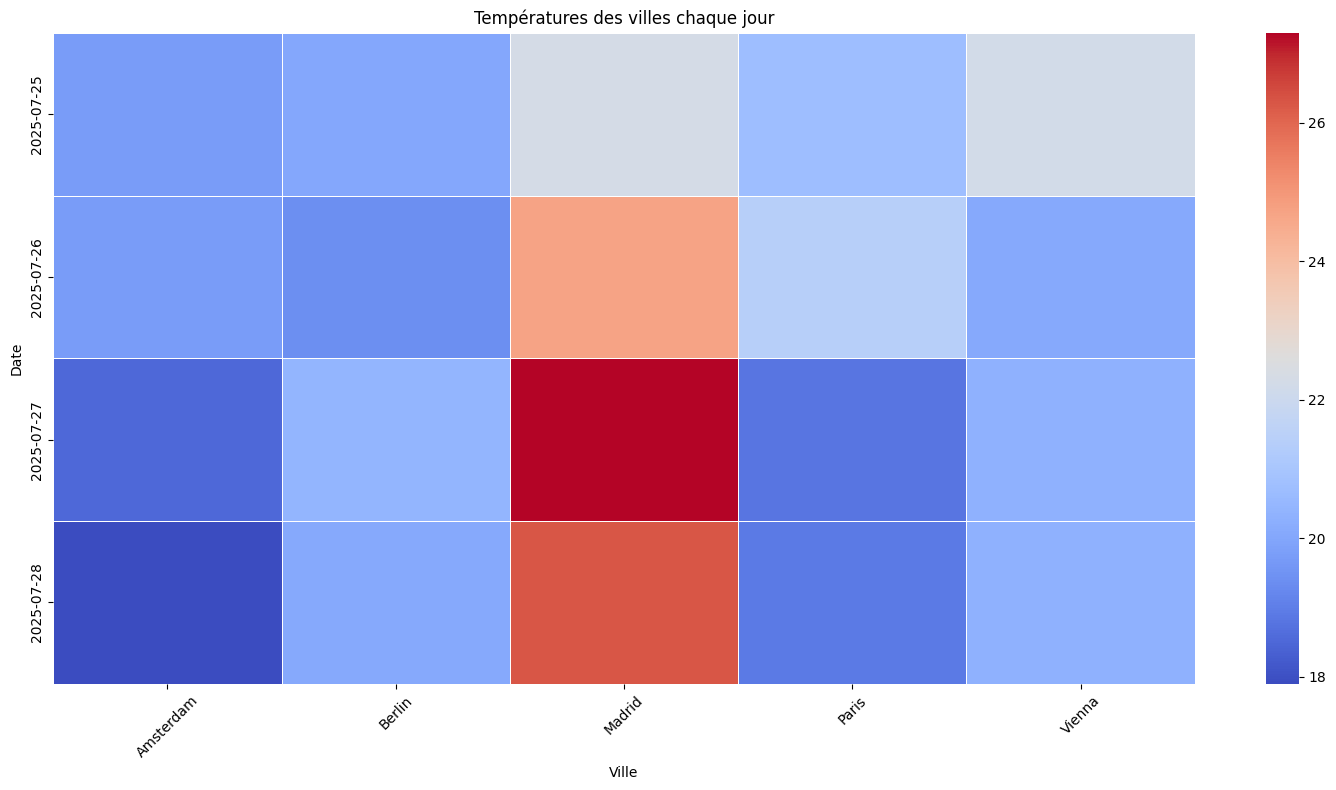

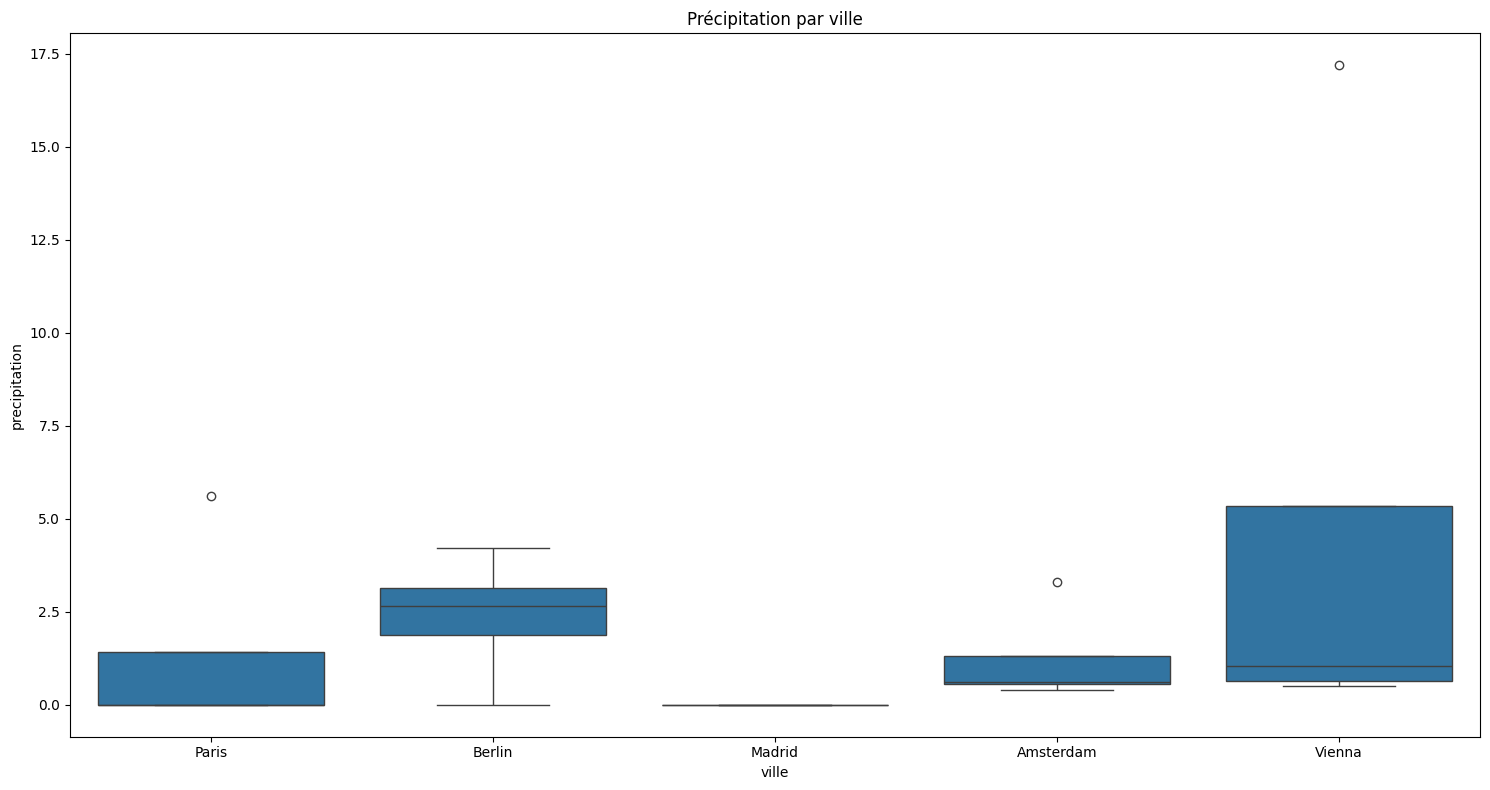

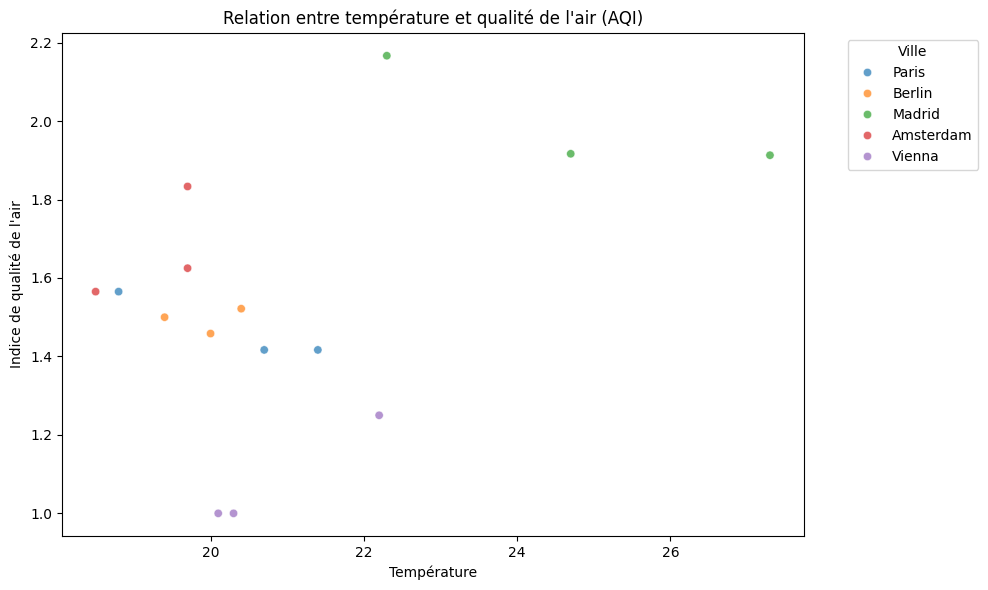

/tmp/ipykernel_841/974336516.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Ville')


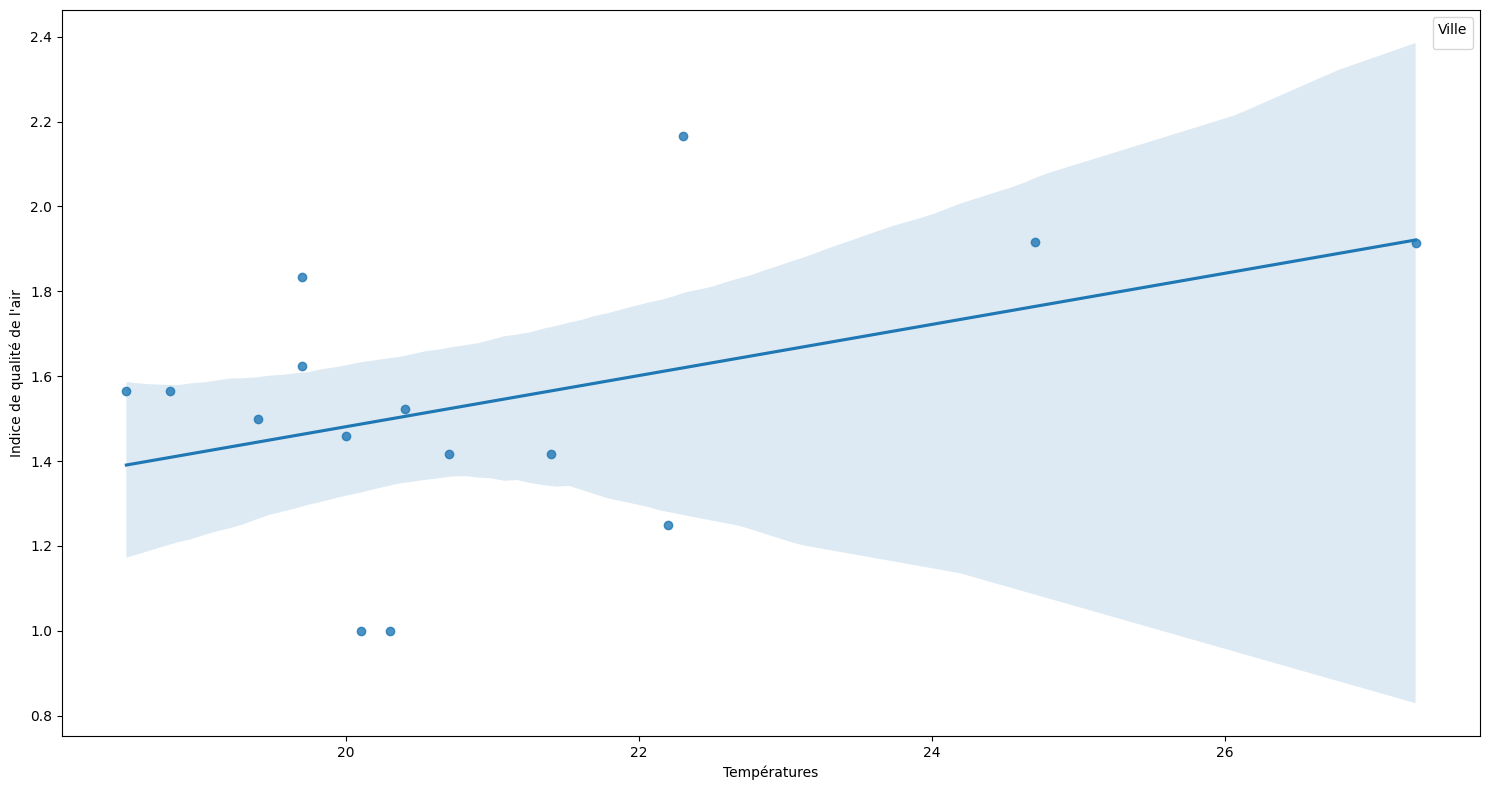

In [135]:
### 💡 Visualisations guidées
# Création d'un pivot table pour correspondre au format lu par sns
pivot_temp = df_merged.pivot(index='date',
                             columns='ville',
                             values='température')

# 1. Heatmap des températures par ville et jour
plt.figure(figsize=(15, 8))
sns.heatmap(pivot_temp, cmap="coolwarm", annot=False, fmt='.1f', linewidths=0.5)
plt.title('Températures des villes chaque jour')
plt.xlabel('Ville')
plt.ylabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Boxplot comparatif des précipitations
# Utilisez seaborn.boxplot()
plt.figure(figsize=(15, 8))
sns.boxplot(df_merged, x='ville', y='precipitation')
plt.title('Précipitation par ville')
plt.tight_layout()
plt.show()
# 3. Scatter plot qualité air vs température

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_merged,
    x='température',      
    y='aqi',              
    hue='ville',          # couleur selon la ville
    alpha=0.7             # transparence pour voir les points superposés
)

plt.title("Relation entre température et qualité de l'air (AQI)")
plt.xlabel("Température")
plt.ylabel("Indice de qualité de l'air")
plt.legend(title='Ville', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Ajoutez une regression line avec seaborn.regplot()
plt.figure(figsize=(15, 8))
sns.regplot(df_merged,
            x='température',
            y='aqi',
            scatter=True
            )
plt.xlabel('Températures')
plt.ylabel('Indice de qualité de l\'air')
plt.legend(title='Ville')
plt.tight_layout()
plt.show()


## Partie 5 : API bonus - Données agricoles

### 🌱 API AgroMonitoring (gratuite)

In [52]:
# API satellite pour l'agriculture
AGRO_API_KEY = "VOTRE_CLE_AGROMONITORING"

def get_soil_data(polygon_coordinates, api_key):
    """
    Récupère des données de sol via satellite
    URL : http://api.agromonitoring.com/agro/1.0/

    Données disponibles :
    - Indices de végétation (NDVI)
    - Humidité du sol
    - Température de surface
    """
    pass



**Défi avancé :** Créez des recommandations de plantation basées sur :
- Données météo des 30 derniers jours
- Prévisions à 5 jours
- Qualité de l'air
- Indices de végétation satellite



## 🏆 Livrables attendus

### 📊 Dashboard météo
Créez un tableau de bord contenant :
1. **Aperçu temps réel** des 6 villes
2. **Graphiques de tendances** sur 30 jours
3. **Alertes qualité de l'air** (AQI > 100)
4. **Recommandations agricoles** par ville

In [53]:
### 📱 Format de présentation

def generate_weather_report(city_data):
    """
    Génère un rapport automatisé

    Format :
    - Résumé exécutif (3 lignes)
    - Métriques clés (tableaux)
    - Graphiques (4 visualisations)
    - Recommandations (bullet points)
    """
    pass

---

## 🎓 Critères d'évaluation

- [ ] **APIs fonctionnelles** : Toutes les connexions API marchent
- [ ] **Gestion d'erreurs** : Code robuste avec try/except
- [ ] **Qualité des données** : Validation et nettoyage
- [ ] **Visualisations** : Graphiques informatifs et esthétiques
- [ ] **Insights business** : Recommandations basées sur les données

### 🔗 Préparation au Notebook 2
Le prochain notebook utilisera une vraie base de données PostgreSQL hébergée pour analyser des données de ventes e-commerce, en croisant avec vos données météo pour des analyses géolocalisées.

### 📚 APIs alternatives (si quotas dépassés)
- **WeatherAPI** : 1M appels/mois gratuits
- **AccuWeather** : 50 appels/jour gratuits  
- **Climatiq** : Données climat et carbone
- **NASA APIs** : Données satellite gratuites